In [190]:
%matplotlib inline

In [191]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [192]:
freedom_data = "starting_data/freedom.csv"
happiness_data = "starting_data/happiness.csv"
kaggle_data = "starting_data/kaggle.csv"

freedom_df = pd.read_csv(freedom_data)
happiness_df = pd.read_csv(happiness_data)

kaggle_df = pd.read_csv(kaggle_data)
kaggle_df = kaggle_df.loc[kaggle_df['year'] == 2016]
kaggle_df = kaggle_df[["countries","hf_score"]]
kaggle_df.columns = ["Country", "Human Freedom"]

freedom_df.columns=["Country", "Personal Freedom","Economic Freedom"]

freedom_and_happiness = pd.merge(freedom_df,happiness_df, on="Country")
freedom_and_happiness = pd.merge(freedom_and_happiness,kaggle_df, on="Country")

freedom_and_happiness["Happiness score"] = round(freedom_and_happiness["Happiness score"],2)
freedom_and_happiness["Human Freedom"] = round(freedom_and_happiness["Human Freedom"],2)


freedom_and_happiness.head()

,Country,Personal Freedom,Economic Freedom,Happiness score,Human Freedom
0,Netherlands,9.40,7.71,7.49,8.55
1,Norway,9.34,7.60,7.55,8.47
2,Sweden,9.33,7.44,7.34,8.39
3,Denmark,9.33,7.77,7.60,8.55
4,Finland,9.29,7.65,7.77,8.47


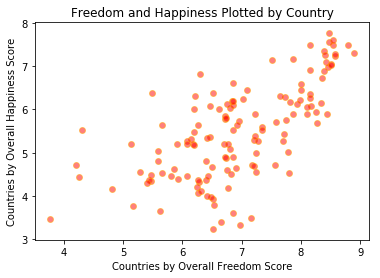

In [193]:
# Scatterplot displaying overall freedom (x) and overall happiness (y)
x_limit = 10
y_limit = 10

plt.scatter(
    x=freedom_and_happiness["Human Freedom"], 
    y=freedom_and_happiness["Happiness score"], 
    marker="o", 
    facecolors="red", 
    edgecolors="orange", 
    alpha=0.50
    )

plt.title("Freedom and Happiness Plotted by Country")
plt.ylabel("Countries by Overall Happiness Score")
plt.xlabel("Countries by Overall Freedom Score")

plt.show()

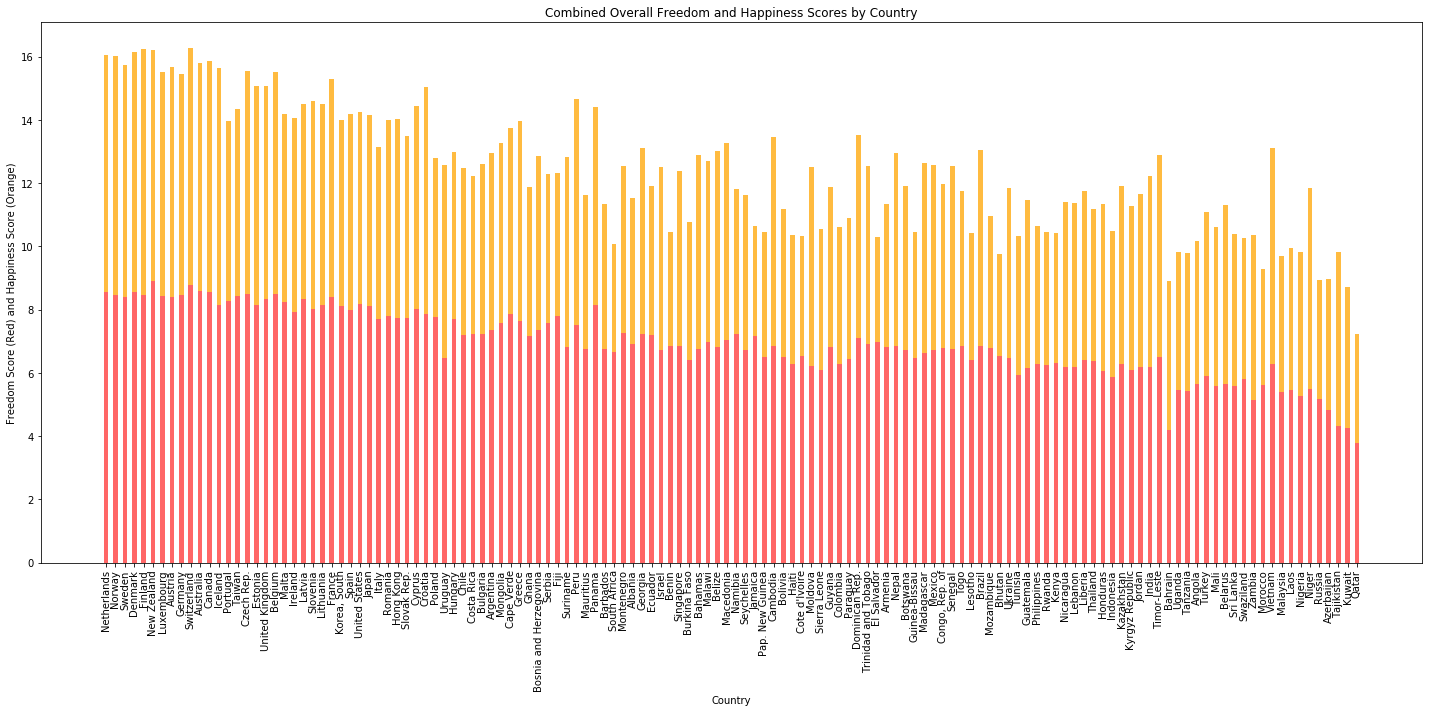

In [198]:
# Bar chart displaying countries' stacked freedom and happiness values

x_axis=freedom_and_happiness["Country"]
y_axis_bottom=freedom_and_happiness["Human Freedom"]
y_axis_top=freedom_and_happiness["Happiness score"]

# plt.figure(figsize=(100, 20))

plt.bar(
    x_axis, 
    y_axis_bottom, 
    color = "red",
    alpha=0.60,
    align="center",
    width=0.5
)

plt.bar(
    x_axis, 
    y_axis_top, 
    color = "orange", 
    alpha=0.75,
    align="center",
    bottom = y_axis_bottom,
    width=0.5
)

plt.xticks(
    x_axis, 
    freedom_df["Country"], 
    rotation="vertical"
    )

# Set a Title and labels
plt.title("Combined Overall Freedom and Happiness Scores by Country")
plt.ylabel("Freedom Score (Red) and Happiness Score (Orange)")
plt.xlabel("Country")
plt.savefig("overall_country_bar_chart.png")
plt.tight_layout()
plt.rcParams["figure.figsize"] = (20,20)
plt.show()